In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:

file_path = "datawithfeature (1).csv"


df = pd.read_csv(file_path, parse_dates=["Date"])

print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1490 non-null   datetime64[ns]
 1   Open       1490 non-null   float64       
 2   Close      1490 non-null   float64       
 3   High       1490 non-null   float64       
 4   Low        1490 non-null   float64       
 5   Volume     1490 non-null   int64         
 6   EMA        1490 non-null   float64       
 7   RSI        1490 non-null   float64       
 8   BB_Middle  1490 non-null   float64       
 9   BB_Upper   1490 non-null   float64       
 10  BB_Lower   1490 non-null   float64       
 11  ADX        1490 non-null   float64       
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 139.8 KB
None
        Date       Open      Close       High        Low     Volume  \
0 2018-11-29  43.568185  42.826386  43.601578  42.385121  167080000   
1 2018-11-30  43

C:\Users\USER\AppData\Local\Temp\ipykernel_8036\2302938797.py:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv(file_path, parse_dates=["Date"])  # Ensure Date is parsed correctly


Data cleaning ,
i think we do some clean the data

In [ ]:



missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)


df = df.dropna()


df.fillna(method="ffill", inplace=True)
df.fillna(method="bfill", inplace=True)


df = df.drop_duplicates()

df.reset_index(drop=True, inplace=True)


print("\n Data after cleaning:")
print(df.info())
print(df.head())


Missing values in each column:
 Date         0
Open         0
Close        0
High         0
Low          0
Volume       0
EMA          0
RSI          0
BB_Middle    0
BB_Upper     0
BB_Lower     0
ADX          0
dtype: int64

✅ Data after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1490 non-null   datetime64[ns]
 1   Open       1490 non-null   float64       
 2   Close      1490 non-null   float64       
 3   High       1490 non-null   float64       
 4   Low        1490 non-null   float64       
 5   Volume     1490 non-null   int64         
 6   EMA        1490 non-null   float64       
 7   RSI        1490 non-null   float64       
 8   BB_Middle  1490 non-null   float64       
 9   BB_Upper   1490 non-null   float64       
 10  BB_Lower   1490 non-null   float64       
 11  ADX        1490 non-null   f

C:\Users\USER\AppData\Local\Temp\ipykernel_8036\1696657656.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)  # Forward fill (use previous value)
C:\Users\USER\AppData\Local\Temp\ipykernel_8036\1696657656.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="bfill", inplace=True)  # Backward fill (use next value)


Scaled the data ,

In [ ]:
from sklearn.preprocessing import MinMaxScaler


features = ["Close", "Open", "High", "Low", "Volume", "EMA", "RSI", "BB_Middle", "BB_Upper", "BB_Lower", "ADX"]


scaler = MinMaxScaler()


df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])


print("\n Data after scaling:")
print(df_scaled.head())



✅ Data after scaling:
        Date      Open     Close      High       Low    Volume       EMA  \
0 2018-11-29  0.045822  0.044105  0.043738  0.042562  0.355392  0.042776   
1 2018-11-30  0.043014  0.042959  0.040825  0.041763  0.333144  0.041430   
2 2018-12-03  0.047954  0.050326  0.046262  0.046747  0.345776  0.040945   
3 2018-12-04  0.043796  0.040728  0.043254  0.040857  0.351161  0.039551   
4 2018-12-06  0.032909  0.038403  0.034278  0.033883  0.368595  0.038058   

        RSI  BB_Middle  BB_Upper  BB_Lower       ADX  
0  0.247130   0.047932  0.070045  0.028146  0.130385  
1  0.262084   0.045292  0.063746  0.029438  0.129090  
2  0.410940   0.043941  0.060929  0.029667  0.122531  
3  0.364647   0.042451  0.059254  0.028396  0.123629  
4  0.389264   0.040706  0.056859  0.027367  0.111834  


sequence creation


In [ ]:
import numpy as np


def create_sequences(data, target_column, window_size):
    X, y = [], []

    for i in range(len(data) - window_size):
        X.append(data.iloc[i : i + window_size].values)
        y.append(data.iloc[i + window_size][target_column]) target price

    return np.array(X), np.array(y)


window_size = 30


target_column = "Close"
X, y = create_sequences(df_scaled[features], target_column, window_size)


print(f"\n✅ X shape: {X.shape}, y shape: {y.shape}")



✅ X shape: (1460, 30, 11), y shape: (1460,)


Train-test split

In [ ]:

train_size = int(0.8 * len(X))


X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


print(f"\n✅ Training Set: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"✅ Testing Set: X_test: {X_test.shape}, y_test: {y_test.shape}")



✅ Training Set: X_train: (1168, 30, 11), y_train: (1168,)
✅ Testing Set: X_test: (292, 30, 11), y_test: (292,)


Build the model , add layer , neurons etc

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization, LeakyReLU, Add, Input
from tensorflow.keras.models import Model


input_layer = Input(shape=(30, 11))


x = Conv1D(filters=256, kernel_size=5, padding='same', activation=None)(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv1D(filters=128, kernel_size=3, padding='same', activation=None)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


residual = Conv1D(filters=128, kernel_size=1, padding='same')(input_layer)
x = Add()([x, residual])  # Skip connection adds input directly


x = Conv1D(filters=64, kernel_size=3, padding='same', activation=None)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv1D(filters=32, kernel_size=3, padding='same', activation=None)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = MaxPooling1D(pool_size=2)(x)
x = Conv1D(filters=16, kernel_size=3, padding='same', activation=None)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Flatten()(x)

x = Dense(512)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(0.4)(x)

x = Dense(256)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(0.3)(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


output_layer = Dense(1)(x)


model = Model(inputs=input_layer, outputs=output_layer)

model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 30, 11)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_18 (Conv1D)  │ (None, 30, 256)   │     14,336 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 30, 256)   │      1,024 │ conv1d_18[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_24      │ (None, 30, 256)   │          0 │ batch_normalizat… │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_19 (Conv1D)  │ (None, 30, 128)   │     98,432 │ leaky_re_lu_24[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 30, 128)   │        512 │ conv1d_19[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_25      │ (None, 30, 128)   │          0 │ batch_normalizat… │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_20 (Conv1D)  │ (None, 30, 128)   │      1,536 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 30, 128)   │          0 │ leaky_re_lu_25[0… │
│                     │                   │            │ conv1d_20[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_21 (Conv1D)  │ (None, 30, 64)    │     24,640 │ add_3[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 30, 64)    │        256 │ conv1d_21[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_26      │ (None, 30, 64)    │          0 │ batch_normalizat… │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_22 (Conv1D)  │ (None, 30, 32)    │      6,176 │ leaky_re_lu_26[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 30, 32)    │        128 │ conv1d_22[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_27      │ (None, 30, 32)    │          0 │ batch_normalizat… │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_3     │ (None, 15, 32)    │          0 │ leaky_re_lu_27[0… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_23 (Conv1D)  │ (None, 15, 16)    │      1,552 │ max_pooling1d_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 15, 16)    │         64 │ conv1d_23[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_28      │ (None, 15, 16)    │          0 │ batch_normalizat

 Total params: 439,985 (1.68 MB)

 Trainable params: 437,201 (1.67 MB)

 Non-trainable params: 2,784 (10.88 KB)

compile the model

In [ ]:

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss='mean_squared_error',
              metrics=['mae'])


model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 30, 11)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_18 (Conv1D)  │ (None, 30, 256)   │     14,336 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 30, 256)   │      1,024 │ conv1d_18[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_24      │ (None, 30, 256)   │          0 │ batch_normalizat… │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_19 (Conv1D)  │ (None, 30, 128)   │     98,432 │ leaky_re_lu_24[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 30, 128)   │        512 │ conv1d_19[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_25      │ (None, 30, 128)   │          0 │ batch_normalizat… │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_20 (Conv1D)  │ (None, 30, 128)   │      1,536 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 30, 128)   │          0 │ leaky_re_lu_25[0… │
│                     │                   │            │ conv1d_20[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_21 (Conv1D)  │ (None, 30, 64)    │     24,640 │ add_3[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 30, 64)    │        256 │ conv1d_21[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_26      │ (None, 30, 64)    │          0 │ batch_normalizat… │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_22 (Conv1D)  │ (None, 30, 32)    │      6,176 │ leaky_re_lu_26[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 30, 32)    │        128 │ conv1d_22[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_27      │ (None, 30, 32)    │          0 │ batch_normalizat… │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_3     │ (None, 15, 32)    │          0 │ leaky_re_lu_27[0… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_23 (Conv1D)  │ (None, 15, 16)    │      1,552 │ max_pooling1d_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 15, 16)    │         64 │ conv1d_23[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_28      │ (None, 15, 16)    │          0 │ batch_normalizat

 Total params: 439,985 (1.68 MB)

 Trainable params: 437,201 (1.67 MB)

 Non-trainable params: 2,784 (10.88 KB)

Train the model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint("best_cnn_model.h5", save_best_only=True, monitor='val_loss')


history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)


Epoch 1/100
13/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.8743 - mae: 0.7285

15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - loss: 0.8405 - mae: 0.7143 - val_loss: 0.4099 - val_mae: 0.6306
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3256 - mae: 0.4403

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.3217 - mae: 0.4375 - val_loss: 0.2538 - val_mae: 0.4924
Epoch 3/100
13/15 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1641 - mae: 0.3030

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.1602 - mae: 0.3001 - val_loss: 0.1625 - val_mae: 0.3911
Epoch 4/100
12/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1003 - mae: 0.2358

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.1007 - mae: 0.2355 - val_loss: 0.1283 - val_mae: 0.3483
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0806 - mae: 0.2112 - val_loss: 0.1458 - val_mae: 0.3728
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0650 - mae: 0.1973

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0647 - mae: 0.1969 - val_loss: 0.0984 - val_mae: 0.3042
Epoch 7/100
13/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0541 - mae: 0.1781

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0536 - mae: 0.1768 - val_loss: 0.0871 - val_mae: 0.2868
Epoch 8/100
13/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0437 - mae: 0.1611

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0439 - mae: 0.1616 - val_loss: 0.0686 - val_mae: 0.2538
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0337 - mae: 0.1425 - val_loss: 0.0739 - val_mae: 0.2619
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0381 - mae: 0.1521

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0380 - mae: 0.1518 - val_loss: 0.0678 - val_mae: 0.2508
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0324 - mae: 0.1379 - val_loss: 0.0685 - val_mae: 0.2536
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0326 - mae: 0.1385

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0327 - mae: 0.1386 - val_loss: 0.0389 - val_mae: 0.1874
Epoch 13/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0299 - mae: 0.1332

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0299 - mae: 0.1331 - val_loss: 0.0318 - val_mae: 0.1642
Epoch 14/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0295 - mae: 0.1361 - val_loss: 0.0396 - val_mae: 0.1829
Epoch 15/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0275 - mae: 0.1254 - val_loss: 0.0442 - val_mae: 0.1925
Epoch 16/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0307 - mae: 0.1277 - val_loss: 0.0385 - val_mae: 0.1700
Epoch 17/100
13/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0245 - mae: 0.1222

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0245 - mae: 0.1223 - val_loss: 0.0262 - val_mae: 0.1462
Epoch 18/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0255 - mae: 0.1243 - val_loss: 0.0385 - val_mae: 0.1827
Epoch 19/100
13/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0277 - mae: 0.1239

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0275 - mae: 0.1236 - val_loss: 0.0217 - val_mae: 0.1319
Epoch 20/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0225 - mae: 0.1134 - val_loss: 0.0257 - val_mae: 0.1373
Epoch 21/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0193 - mae: 0.1034 - val_loss: 0.0274 - val_mae: 0.1427
Epoch 22/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0180 - mae: 0.1045 - val_loss: 0.0255 - val_mae: 0.1381
Epoch 23/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0188 - mae: 0.1015 - val_loss: 0.0322 - val_mae: 0.1574
Epoch 24/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0169 - mae: 0.0995 - val_loss: 0.0437 - val_mae: 0.1851
Epoch 25/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0162 - mae: 0.0997 - val_loss: 0.0220 - val_mae: 0.1277
Epoch 26/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0137 - mae: 0.0878 - val_loss: 0.0277 - val_mae: 0.1560
Epoch 27/100
13/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0163 - mae: 0.0973 - val_loss: 0.0163 - val_mae: 0.1212
Epoch 28/100
13/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0134 - mae: 0.0905

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0136 - mae: 0.0910 - val_loss: 0.0161 - val_mae: 0.1141
Epoch 29/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0138 - mae: 0.0895 - val_loss: 0.0284 - val_mae: 0.1531
Epoch 30/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0124 - mae: 0.0852 - val_loss: 0.0338 - val_mae: 0.1737
Epoch 31/100
13/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0131 - mae: 0.0847

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0132 - mae: 0.0851 - val_loss: 0.0140 - val_mae: 0.1093
Epoch 32/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0119 - mae: 0.0822 - val_loss: 0.0151 - val_mae: 0.1114
Epoch 33/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0128 - mae: 0.0860 - val_loss: 0.0143 - val_mae: 0.1129
Epoch 34/100
13/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0130 - mae: 0.0898

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0131 - mae: 0.0898 - val_loss: 0.0103 - val_mae: 0.0902
Epoch 35/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0122 - mae: 0.0857 - val_loss: 0.0117 - val_mae: 0.0953
Epoch 36/100
13/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0099 - mae: 0.0796

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0100 - mae: 0.0800 - val_loss: 0.0080 - val_mae: 0.0763
Epoch 37/100
13/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0096 - mae: 0.0744

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0097 - mae: 0.0749 - val_loss: 0.0026 - val_mae: 0.0432
Epoch 38/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0090 - mae: 0.0729 - val_loss: 0.0039 - val_mae: 0.0523
Epoch 39/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0112 - mae: 0.0778 - val_loss: 0.0079 - val_mae: 0.0738
Epoch 40/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0114 - mae: 0.0835 - val_loss: 0.0049 - val_mae: 0.0592
Epoch 41/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0098 - mae: 0.0743 - val_loss: 0.0047 - val_mae: 0.0590
Epoch 42/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0109 - mae: 0.0814 - val_loss: 0.0044 - val_mae: 0.0578
Epoch 43/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0084 - mae: 0.0718 - val_loss: 0.0027 - val_mae: 0.0449
Epoch 44/100
13/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0099 - mae: 0.0770

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0099 - mae: 0.0769 - val_loss: 0.0024 - val_mae: 0.0417
Epoch 45/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0092 - mae: 0.0732 - val_loss: 0.0054 - val_mae: 0.0612
Epoch 46/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0092 - mae: 0.0735 - val_loss: 0.0048 - val_mae: 0.0593
Epoch 47/100
13/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0086 - mae: 0.0729

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0085 - mae: 0.0724 - val_loss: 0.0015 - val_mae: 0.0309
Epoch 48/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0092 - mae: 0.0735 - val_loss: 0.0022 - val_mae: 0.0398
Epoch 49/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0079 - mae: 0.0691 - val_loss: 0.0060 - val_mae: 0.0646
Epoch 50/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0088 - mae: 0.0724 - val_loss: 0.0033 - val_mae: 0.0491
Epoch 51/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0076 - mae: 0.0672 - val_loss: 0.0017 - val_mae: 0.0299
Epoch 52/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0066 - mae: 0.0637 - val_loss: 0.0042 - val_mae: 0.0540
Epoch 53/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0069 - mae: 0.0651 - val_loss: 0.0016 - val_mae: 0.0341
Epoch 54/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0078 - mae: 0.0682 - val_loss: 0.0031 - val_mae: 0.0467
Epoch 55/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 

Evaluate the model with scores

In [ ]:

test_loss, test_mae = model.evaluate(X_test, y_test)

print(f"Test Loss (MSE): {test_loss:.6f}")
print(f"Test MAE: {test_mae:.6f}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0015 - mae: 0.0335
Test Loss (MSE): 0.001601
Test MAE: 0.033461


metrics checking

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


y_pred = model.predict(X_test)

# #Reverse scaling (if needed)
# y_pred = scaler.inverse_transform(y_pred)
# y_test = scaler.inverse_transform(y_test.reshape(-1, 1))


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.6f}")
print(f"Mean Absolute Error (MAE): {mae:.6f}")
print(f"R² Score: {r2:.6f}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
Mean Squared Error (MSE): 0.001601
Root Mean Squared Error (RMSE): 0.040014
Mean Absolute Error (MAE): 0.033461
R² Score: 0.860886


plot the actual vs predicted value

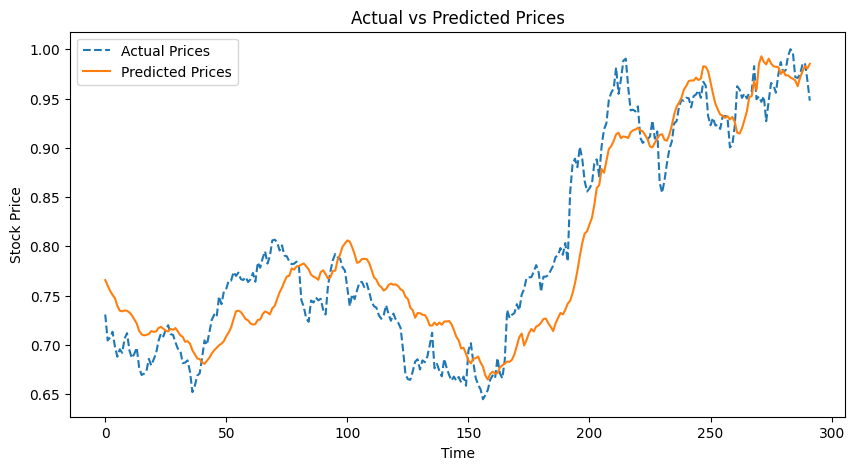

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 5))
plt.plot(y_test, label="Actual Prices", linestyle='dashed')
plt.plot(y_pred, label="Predicted Prices")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.show()


orignal graph for see and checking the another graph

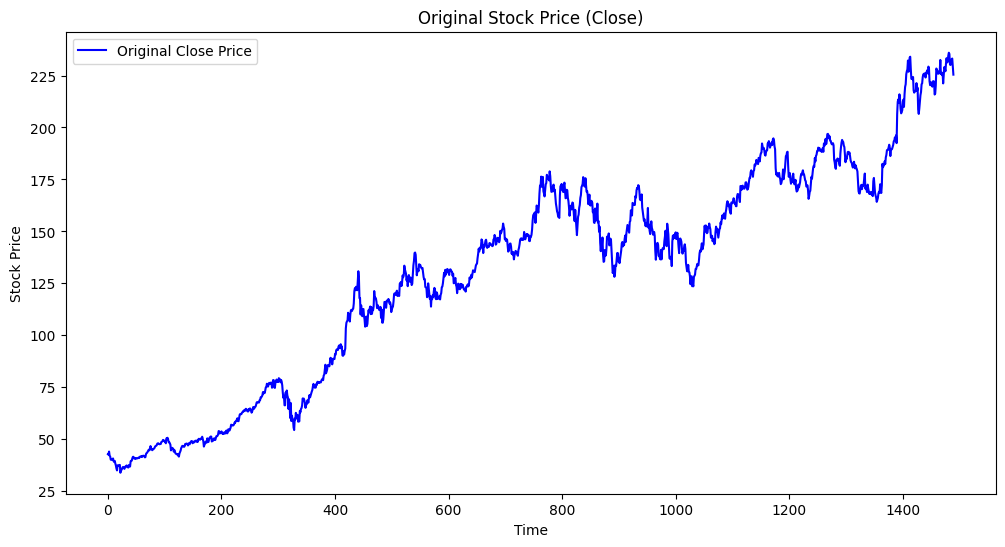

In [ ]:
# CLOSE GRAPH

plt.figure(figsize=(12, 6))
plt.plot(df["Close"], label="Original Close Price", color='blue')
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Original Stock Price (Close)")
plt.legend()
plt.show()


prediction section start from here

In [ ]:
import numpy as np


last_sequence = X_test[-1]
last_sequence = np.expand_dims(last_sequence, axis=0)


extract the future values

In [ ]:
future_predictions = []

for _ in range(30):
    next_pred = model.predict(last_sequence)
    future_predictions.append(next_pred[0, 0])


    new_sequence = np.roll(last_sequence, shift=-1, axis=1)
    new_sequence[0, -1, 0] = next_pred[0, 0]

    last_sequence = new_sequence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━

pata nhi!!!!!!

In [ ]:

future_predictions_scaled = np.zeros((30, 11))

future_predictions_scaled[:, 0] = future_predictions


future_predictions_original = scaler.inverse_transform(future_predictions_scaled)


future_predictions_original = future_predictions_original[:, 0]


plot the predicted value graph

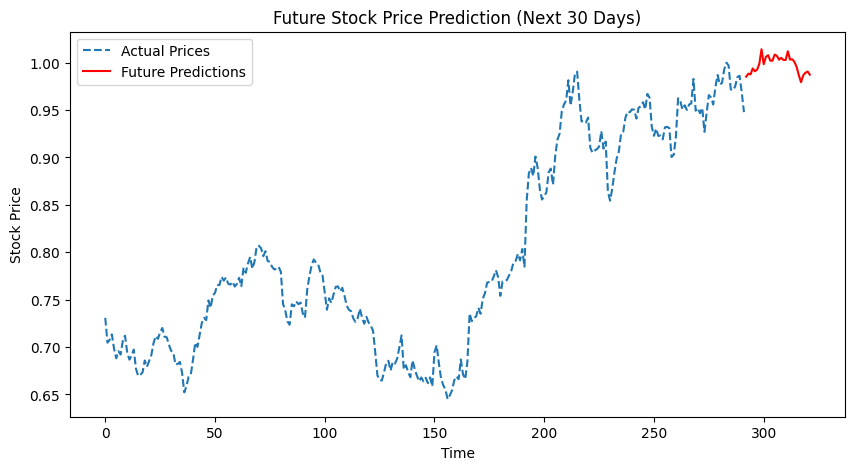

In [ ]:
import matplotlib.pyplot as plt

s
future_days = np.arange(len(y_test), len(y_test) + 30)

plt.figure(figsize=(10, 5))
plt.plot(range(len(y_test)), y_test, label="Actual Prices", linestyle='dashed')
plt.plot(future_days, future_predictions, label="Future Predictions", color='red')

plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Future Stock Price Prediction (Next 30 Days)")
plt.legend()
plt.show()


In [ ]:
df.tail()

,Date,Open,Close,High,Low,Volume,EMA,RSI,BB_Middle,BB_Upper,BB_Lower,ADX
1485,2024-10-25,229.235479,230.901810,232.707832,229.065854,38802300,229.870535,66.385722,229.555276,237.287714,221.822839,3.388258
1486,2024-10-28,232.807625,232.887436,234.214517,232.039312,36087100,230.157859,63.837509,229.575232,237.341526,221.808938,3.349058
1487,2024-10-29,232.588105,233.156845,233.815399,231.809819,35417200,230.443476,58.579148,229.947412,237.647589,222.247235,3.141657
1488,2024-10-30,232.099163,229.594681,232.957275,229.045886,47070900,230.362639,51.952822,230.113047,237.621369,222.604725,3.254979
1489,2024-10-31,228.836355,225.413895,229.325284,224.875072,64370100,229.891330,47.252007,230.125021,237.600874,222.649168,3.425318


plot the graph with original values ( not scaled)

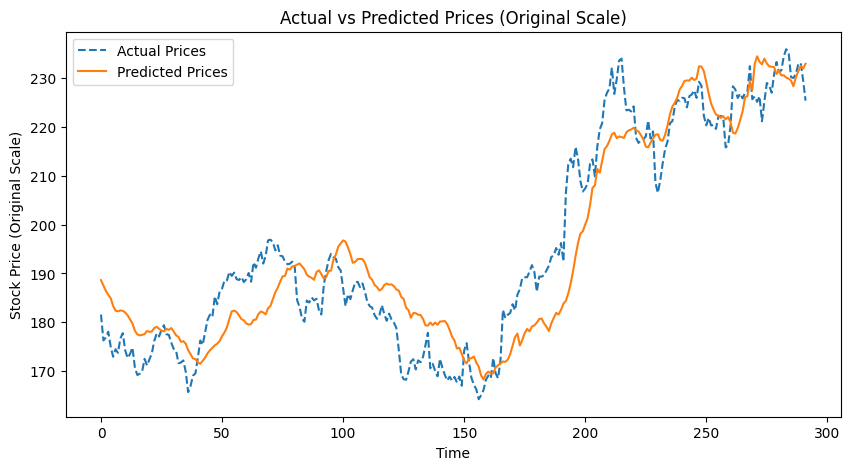

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


y_test_original = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((len(y_test), 10))), axis=1))[:, 0]
y_pred_original = scaler.inverse_transform(np.concatenate((y_pred.reshape(-1, 1), np.zeros((len(y_pred), 10))), axis=1))[:, 0]


plt.figure(figsize=(10, 5))
plt.plot(y_test_original, label="Actual Prices", linestyle='dashed')
plt.plot(y_pred_original, label="Predicted Prices")

plt.xlabel("Time")
plt.ylabel("Stock Price (Original Scale)")
plt.title("Actual vs Predicted Prices (Original Scale)")
plt.legend()
plt.show()


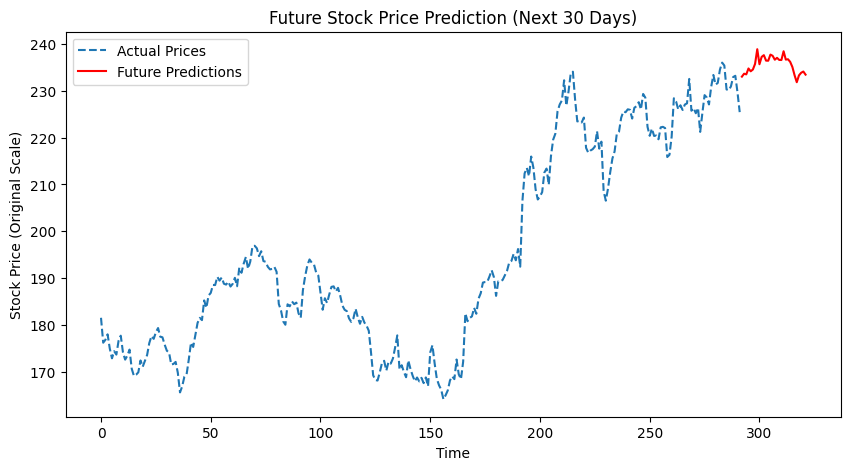

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


y_test_original = scaler.inverse_transform(
    np.concatenate((y_test.reshape(-1, 1), np.zeros((len(y_test), 10))), axis=1)
)[:, 0]


future_predictions_original = scaler.inverse_transform(
    np.concatenate((np.array(future_predictions).reshape(-1, 1), np.zeros((30, 10))), axis=1)
)[:, 0]

future_days = np.arange(len(y_test_original), len(y_test_original) + 30)


plt.figure(figsize=(10, 5))
plt.plot(range(len(y_test_original)), y_test_original, label="Actual Prices", linestyle='dashed')
plt.plot(future_days, future_predictions_original, label="Future Predictions", color='red')

plt.xlabel("Time")
plt.ylabel("Stock Price (Original Scale)")
plt.title("Future Stock Price Prediction (Next 30 Days)")
plt.legend()
plt.show()
